In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#pd.set_option('display.max_rows', 10)
application_train_df = pd.read_csv("/home/jyothish/Projects/Home-Credit-Default-Risk-Prediction/data/home-credit-default-risk_data/application_train.csv")
application_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
application_train_df.columns

Index([u'SK_ID_CURR', u'TARGET', u'NAME_CONTRACT_TYPE', u'CODE_GENDER',
       u'FLAG_OWN_CAR', u'FLAG_OWN_REALTY', u'CNT_CHILDREN',
       u'AMT_INCOME_TOTAL', u'AMT_CREDIT', u'AMT_ANNUITY',
       ...
       u'FLAG_DOCUMENT_18', u'FLAG_DOCUMENT_19', u'FLAG_DOCUMENT_20',
       u'FLAG_DOCUMENT_21', u'AMT_REQ_CREDIT_BUREAU_HOUR',
       u'AMT_REQ_CREDIT_BUREAU_DAY', u'AMT_REQ_CREDIT_BUREAU_WEEK',
       u'AMT_REQ_CREDIT_BUREAU_MON', u'AMT_REQ_CREDIT_BUREAU_QRT',
       u'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

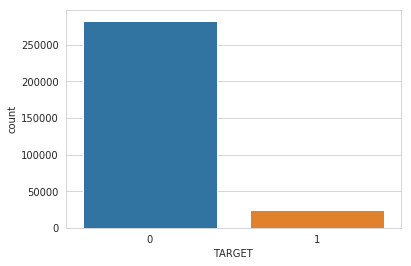

In [45]:
# Ploting TARGET column
sns.set_style('whitegrid')
sns.countplot(x='TARGET', data=application_train_df)

In [46]:
# Categorical features
categorical_features = [feature for feature in application_train_df.columns if application_train_df[feature].dtypes == 'O' ]
print(categorical_features)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [47]:
# Numerical features
numerical_features = [feature for feature in application_train_df.columns if application_train_df[feature].dtypes != 'O' ]
print(numerical_features)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEAR

In [48]:
# Corelation of features with label
correlations = application_train_df.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


('Most Positive Correlations:\n', DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 15, dtype: float64)
('\nMost Negative Correlations:\n', EXT_SOURCE_3      -0.178919
EXT_SOURCE_2      -0.160472
EXT_SOURCE_1      -0.155317
DAYS_EMPLOYED     -0.044932
FLOORSMAX_AVG     -0.044003
                     ...   
ELEVATORS_MEDI    -0.033863
FLOORSMIN_AVG     -0.033614
FLOORSMIN_MEDI    -0.033394
LIVINGAREA_AVG    -0.032997
LIVINGAREA_MEDI   -0.032739
Name: TARGET, Length: 15, dtype: float64)


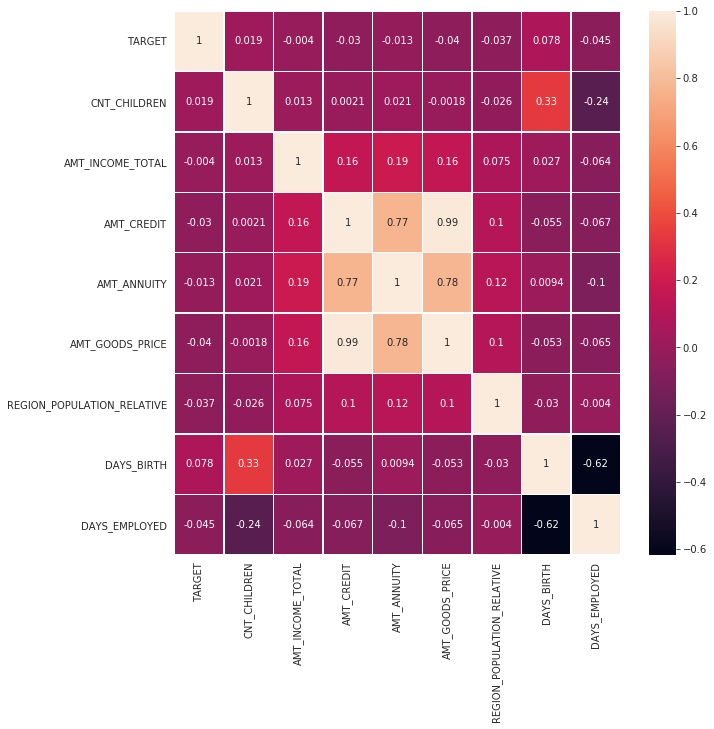

In [24]:
# Plotting corelation matrix for application_train_df dataframe
fig, ax = plt.subplots(figsize=(10,10)) 
corrMatrix_application_train =  application_train_df[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']].corr()
sns.heatmap(corrMatrix_application_train, annot=True, linewidths=.5, ax=ax)
plt.show()

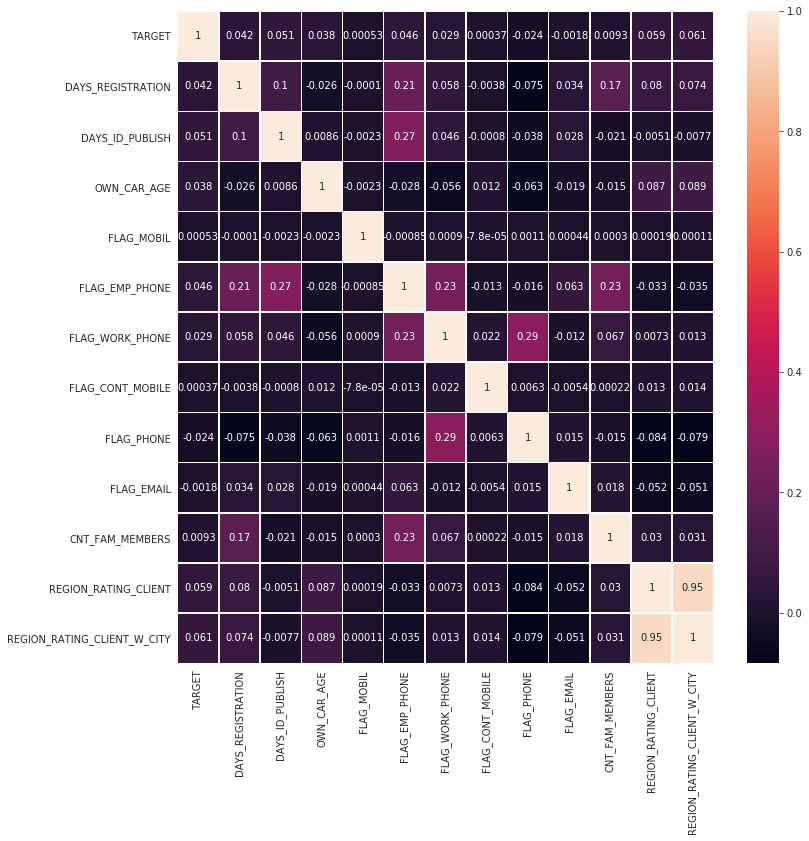

In [32]:
# Plotting corelation matrix for application_train_df dataframe
fig, ax = plt.subplots(figsize=(12,12)) 
corrMatrix_application_train =  application_train_df[['TARGET', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].corr()
sns.heatmap(corrMatrix_application_train, annot=True, linewidths=.5, ax=ax)
plt.show()

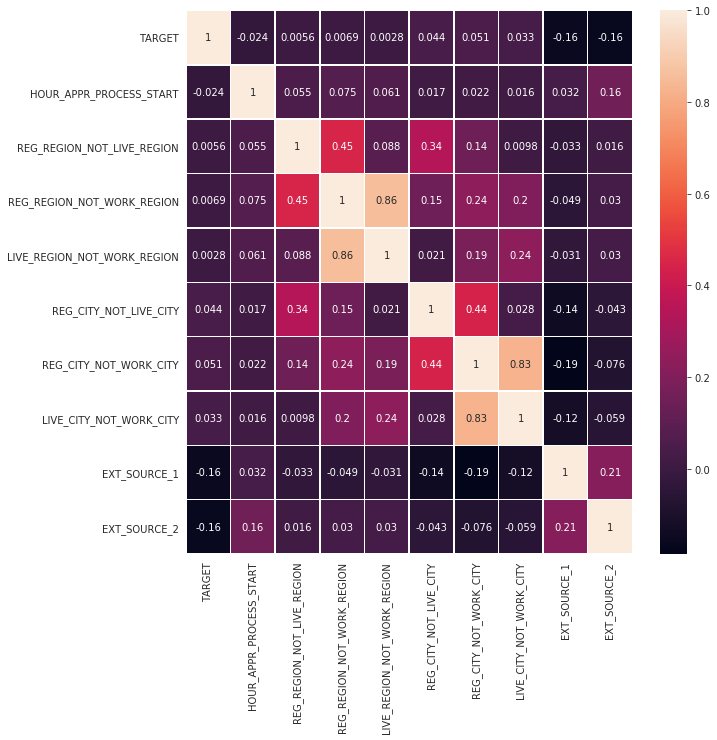

In [33]:
# Plotting corelation matrix for application_train_df dataframe
fig, ax = plt.subplots(figsize=(10,10)) 
corrMatrix_application_train =  application_train_df[['TARGET', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2']].corr()
sns.heatmap(corrMatrix_application_train, annot=True, linewidths=.5, ax=ax)
plt.show()

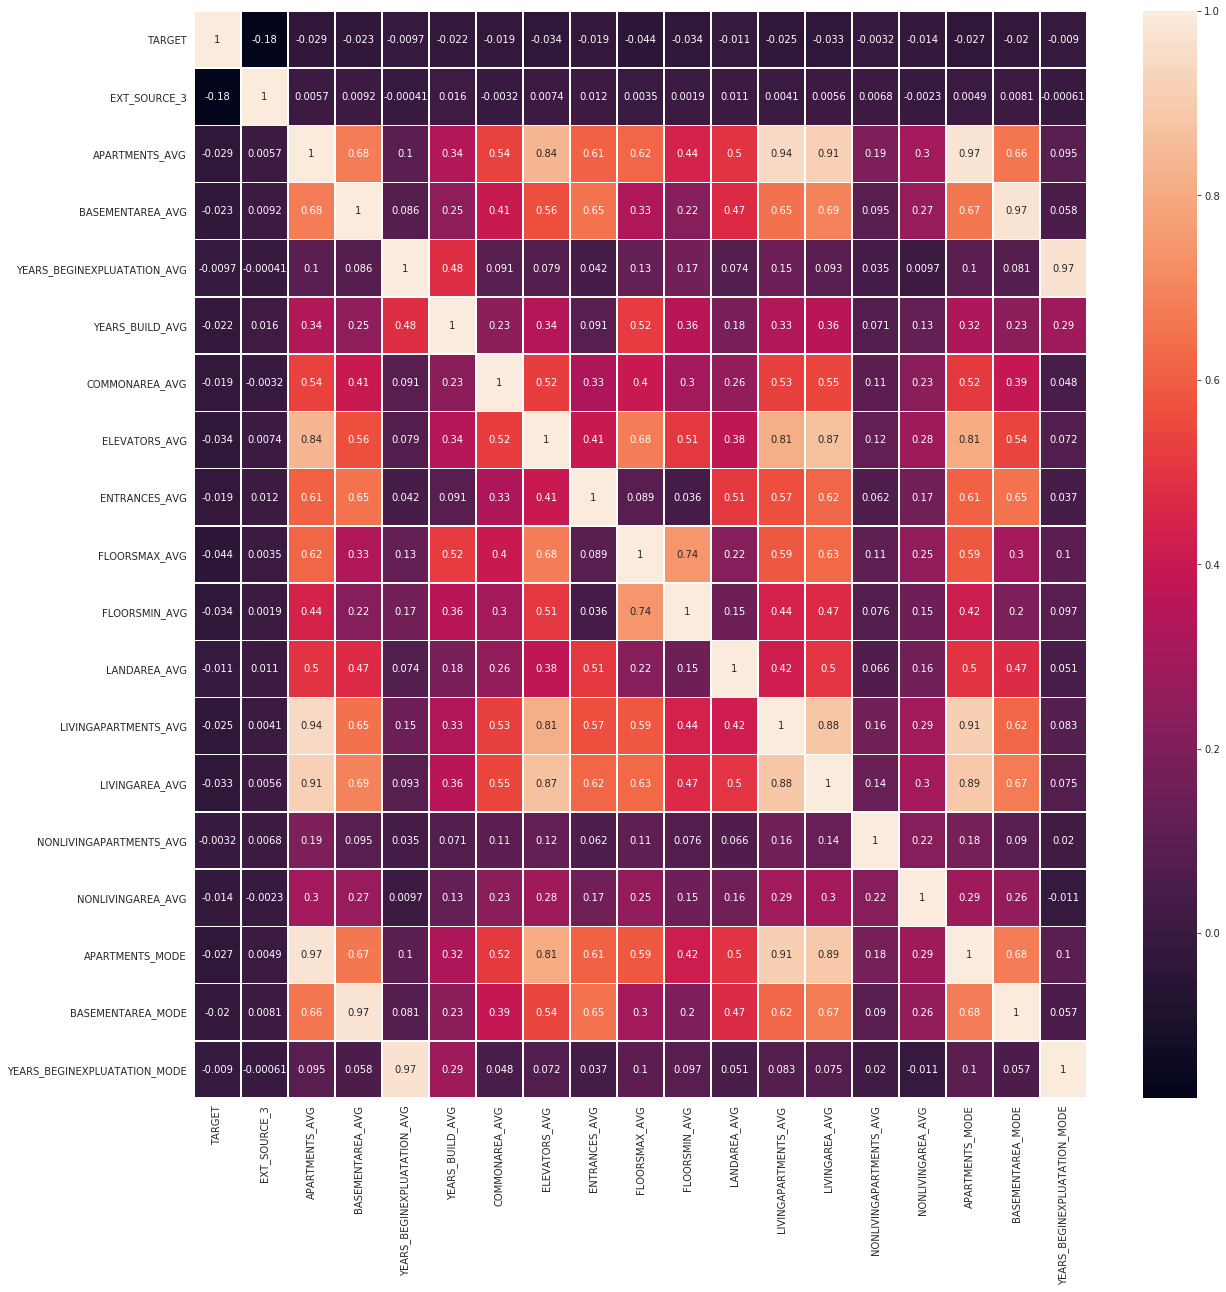

In [34]:
# Plotting corelation matrix for application_train_df dataframe
fig, ax = plt.subplots(figsize=(20,20)) 
corrMatrix_application_train =  application_train_df[['TARGET', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE']].corr()
sns.heatmap(corrMatrix_application_train, annot=True, linewidths=.5, ax=ax)
plt.show()

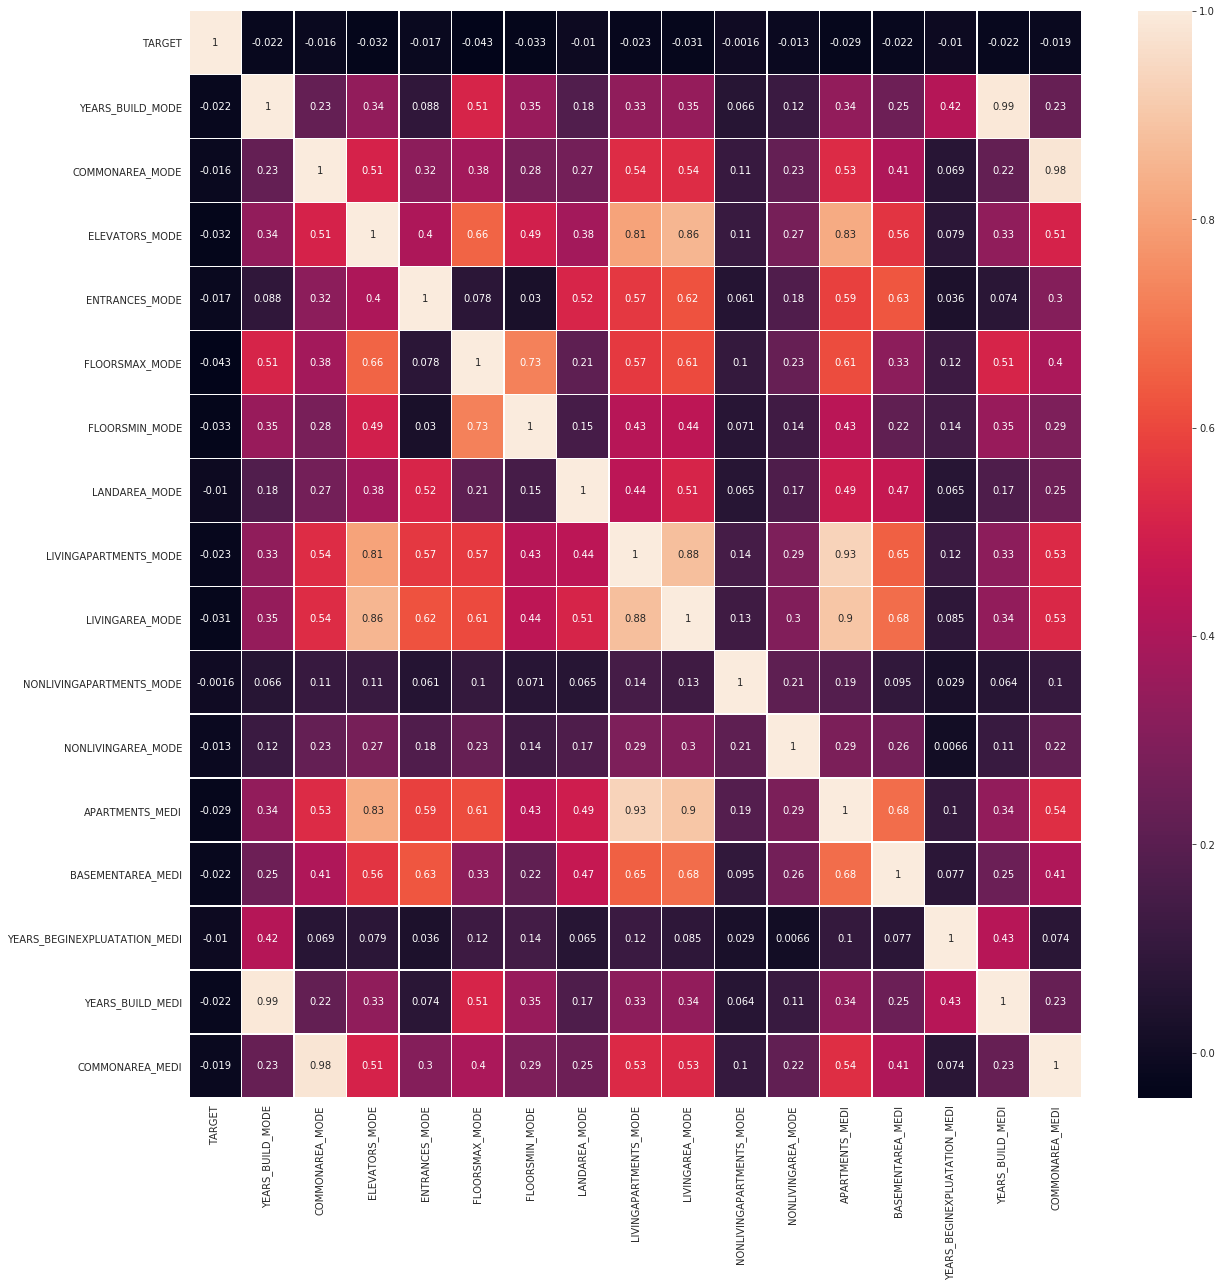

In [35]:
# Plotting corelation matrix for application_train_df dataframe
fig, ax = plt.subplots(figsize=(20,20)) 
corrMatrix_application_train =  application_train_df[['TARGET', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI']].corr()
sns.heatmap(corrMatrix_application_train, annot=True, linewidths=.5, ax=ax)
plt.show()

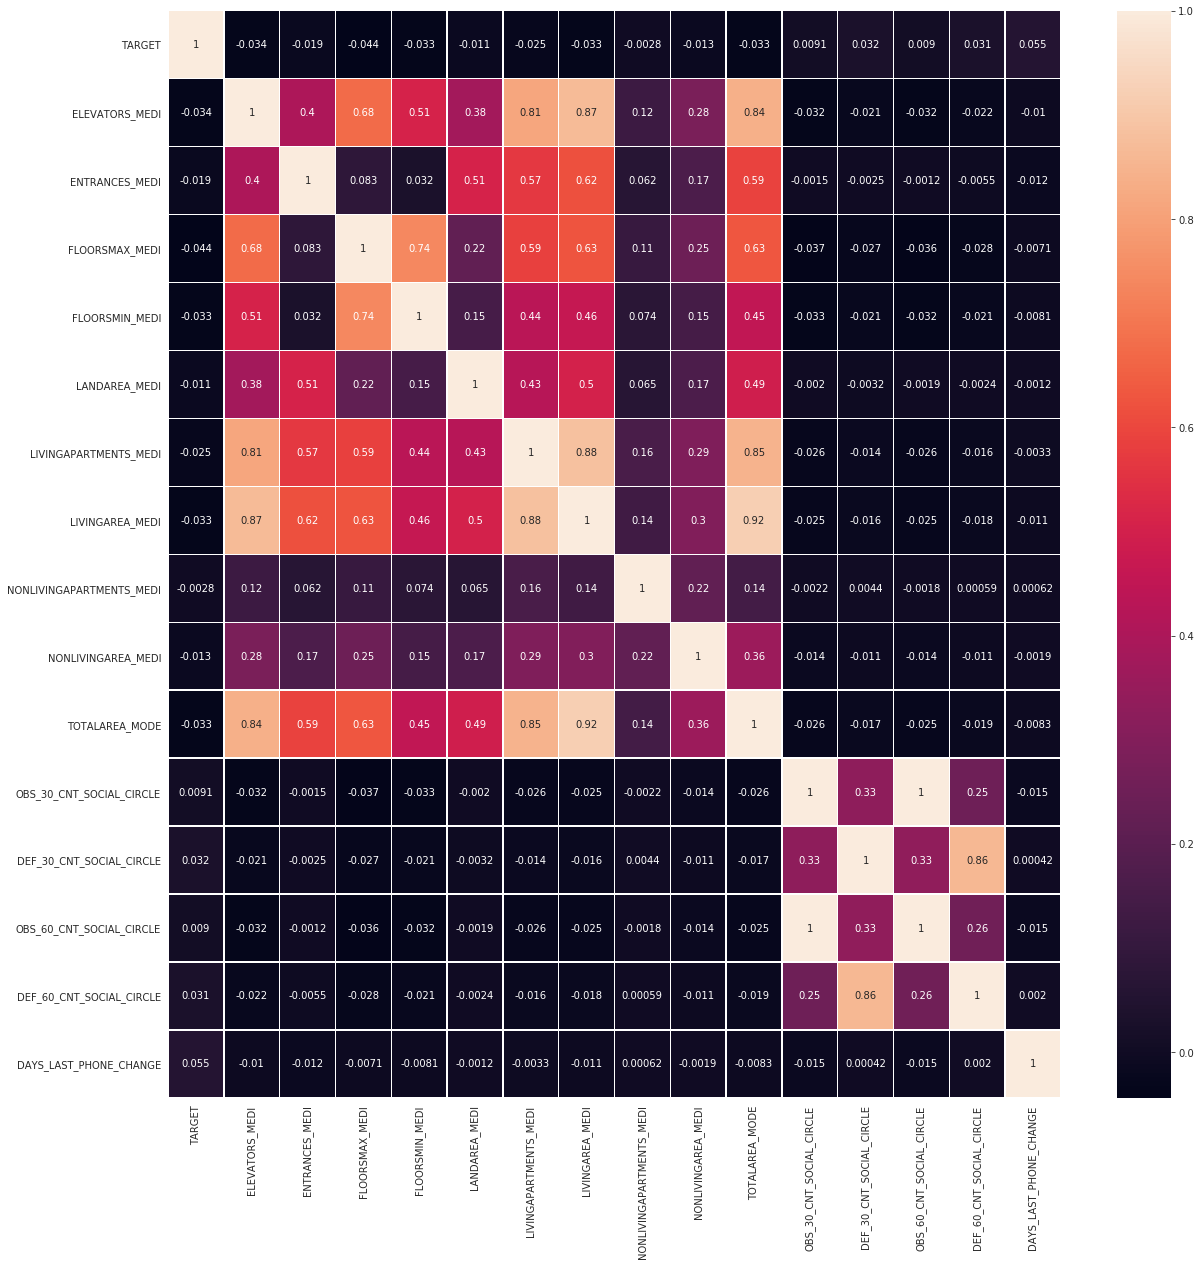

In [36]:
# Plotting corelation matrix for application_train_df dataframe
fig, ax = plt.subplots(figsize=(20,20)) 
corrMatrix_application_train =  application_train_df[['TARGET', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']].corr()
sns.heatmap(corrMatrix_application_train, annot=True, linewidths=.5, ax=ax)
plt.show()

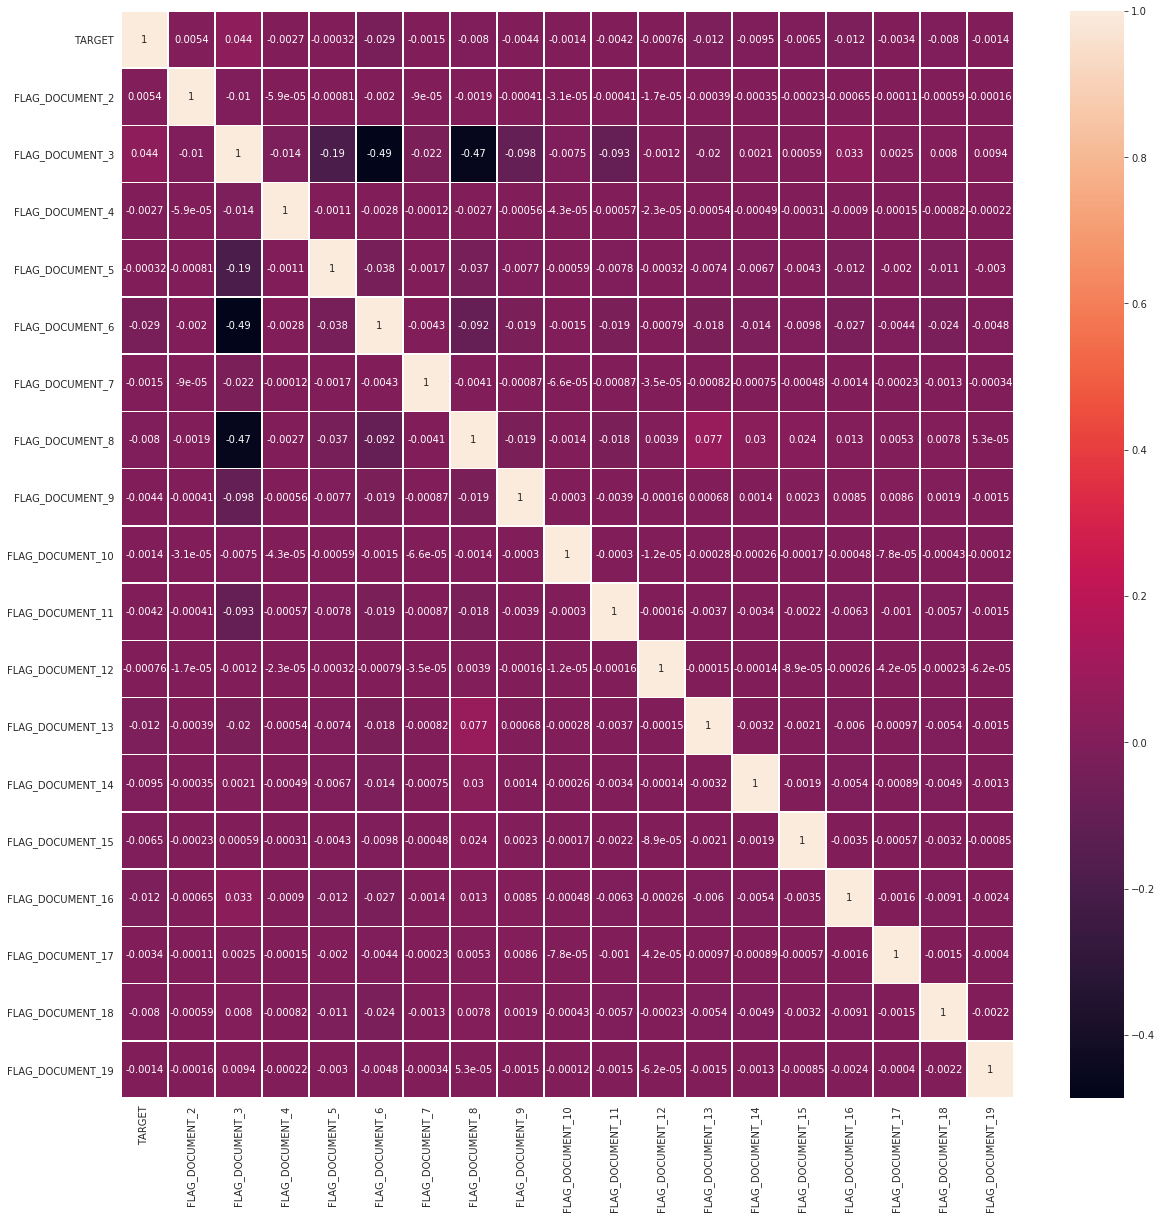

In [37]:
# Plotting corelation matrix for application_train_df dataframe
fig, ax = plt.subplots(figsize=(20,20)) 
corrMatrix_application_train =  application_train_df[['TARGET', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19']].corr()
sns.heatmap(corrMatrix_application_train, annot=True, linewidths=.5, ax=ax)
plt.show()

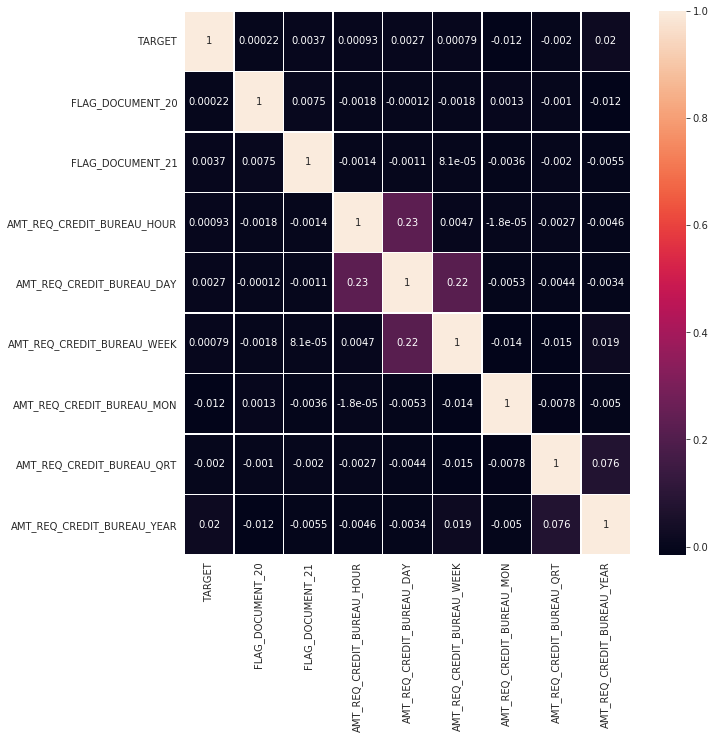

In [39]:
# Plotting corelation matrix for application_train_df dataframe
fig, ax = plt.subplots(figsize=(10,10)) 
corrMatrix_application_train =  application_train_df[['TARGET','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
sns.heatmap(corrMatrix_application_train, annot=True, linewidths=.5, ax=ax)
plt.show()